# Week 4 Activity: Delay, Filters, Reverb

Complete this activity as part of your participation grade. Pending length of the lecture, you will have time in class to work. Everything you need to complete this activity can be found in this week's (or a previous week's) lecture code. For this activity, you may want to consult your Audio Tech I notes (or the Computer Music Tutorial)

In [25]:
import numpy as np
from scipy.io.wavfile import read
from scipy.signal import sawtooth, square, butter, filtfilt
import matplotlib.pyplot as plt
from IPython.display import Audio

## Delay
1) Create a function that will modify a passed signal by adding a delay of $m$ milliseconds to the signal.

In [26]:
def delay(x, t, fs=44100):
    size = int(fs*(t/1000))
    pad = np.zeros(size)

    org = np.concatenate((x, pad))
    dly = np.concatenate((pad, x))

    return org + dly

2) Modify the function such that you can optionally scale the amplitude of the delayed signal 

In [27]:
def delay(x, t, a=1., fs=44100):
    size = int(fs*(t/1000))
    pad = np.zeros(size)

    org = np.concatenate((x, pad))
    dly = np.concatenate((pad, x))

    return org + a*dly

3) Modify the function so that the user can specify the number of delays to add to the original signal (and optionally, scale each subsequent delay amplitude by a factor of $1/n$

In [28]:
def delay(x, t, a=1., n=1, fs=44100):
    size = int(fs*(t/1000))
    sig = np.concatenate((x, np.zeros(size*n)))

    for i in range(n):
        before = np.zeros(size * (i + 1))
        after = np.zeros(size * (n - i - 1))
        dly = np.concatenate((before, x, after))
        sig += a**(i+1)*dly

    return sig

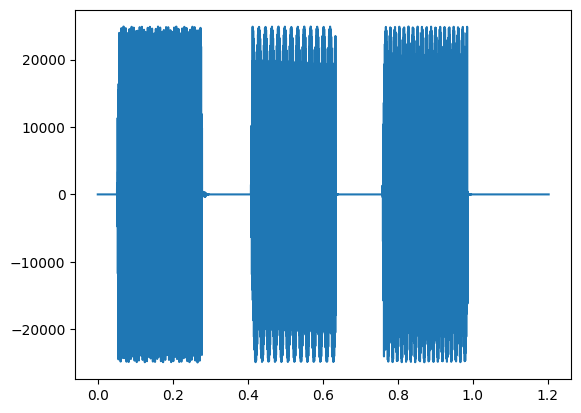

In [29]:
fs, x = read('../audio/dialTones.wav')
t = np.arange(x.size)/fs

plt.plot(t, x)
Audio(x, rate=fs)

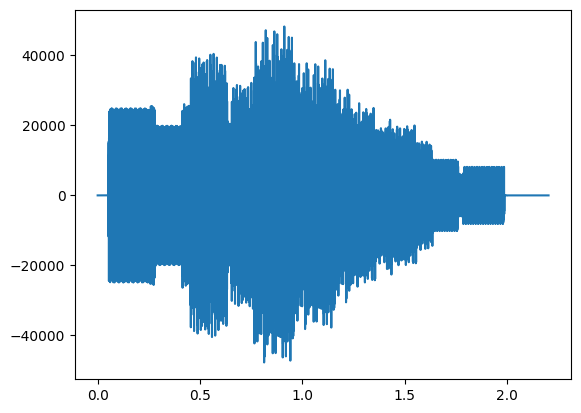

In [30]:
dly = delay(x, 200, 0.8, 5, fs)
t = np.arange(dly.size)/fs

plt.plot(t, dly)
Audio(dly, rate=fs)

## Filters
1. Create a function that will apply an feedforward comb filter by computing the delay length based off a given resonant frequency in Hz.

In [31]:
def ffcf(x, f0, a=-1., fs=44100):
    n = 1 if a>0 else 2 # this is how you do ternary operators in python i know we didnt cover these but this is just easier
    K = 1/(n*f0)
    Ks = int(K*fs)

    y = np.zeros_like(x)
    for i in range(x.size):
        y[i] = x[i]
        if i - Ks >= 0:
            y[i] += a*x[i-Ks]
    
    return y

2. Create a function that will apply an feedback comb filter by computing the delay length based off a given resonant frequency in Hz.

In [32]:
def fbcf(x, f0, a=0.5, fs=41400):
    n = 1 if a<0 else 2
    K = 1/(n*f0)
    Ks = int(K*fs)

    y = np.zeros_like(x)
    for i in range(x.size):
        y[i] = x[i]
        if i - Ks >= 0:
            y[i] += a*y[i-Ks]
    
    return y

4. Use your comb filter functions on a wave from the audio folder. Try applying different resonant frequencies and delay lengths. How are the filter results different?

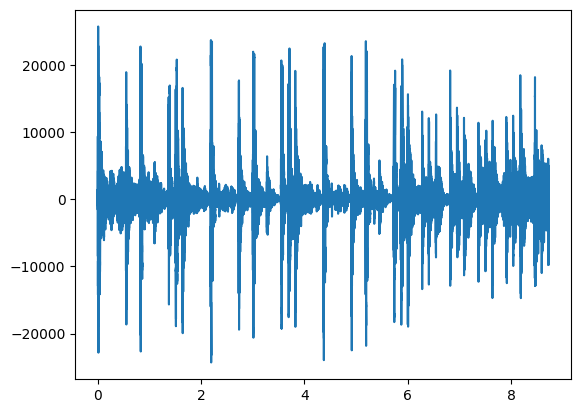

In [33]:
fs, x = read('../audio/80spopDrums.wav')
t = np.arange(x.size)/fs

plt.plot(t, x)
Audio(x, rate=fs)

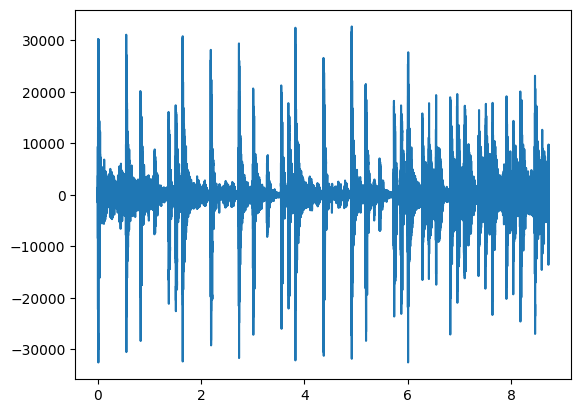

In [34]:
ff = ffcf(x, 200)

plt.plot(t, ff)
Audio(ff, rate=fs)

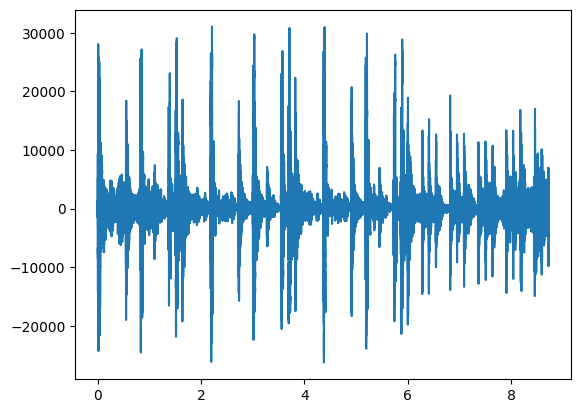

In [35]:
fb = fbcf(x, 200)

plt.plot(t, fb)
Audio(fb, rate=fs)

3. Create a function that will apply a butterworth filter to a signal with filter type options 'highpass', 'lowpass', 'bandpass', and 'bandstop'.

## Reverb/Convolution

1. Create a function that will apply a simple moving average filter by convolving the filter kernel and an incoming signal.

2. Apply your filter to a noise signal. What is the effect? What happens if you increase or decrease the kernel size?

3. Create a function that applies convolution reverb to an input signal given an impulse response (this can be default loaded from the audio files). Use np.convolve to create this function.

4. Create another function that applies convolution reverb to an input signal given an impulse response, but this time do not use np.convolve. You should write the convolution from scratch.

    Challenge yourself to create the most efficient function and time your implementation against np.convolve. 
    While developing and testing your function, do not use real audio files. Start with short signals (e.g., impulses, noise, or short sinusoids). Using long signals with loop-based implementations will result in extremely slow run times.

    **Hint:** in a similar manner to how you may have designed your delay function, recall the functions `numpy.zeros` and `numpy.roll` along with how to manipulate multidimensional numpy arrays (e.g., scalar product, summing columns with `vstack`, etc.) If you plan to try `numpy.roll` DO NOT use it in a loop for convolution with a real audio file! (You'll kill your memory), instead consider the `map` function. You may also want to check out the following function which is similar to numpy.roll but more efficient for this task: `scipy.linalg.circulant`.

    You may wish to visit [here](https://numpy.org/doc/stable/user/basics.broadcasting.html) for review of broadcasting (i.e., form some calculation across index value I and column value C) in numpy